In [2]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve, train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
!pip install xgboost
from xgboost import XGBClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

warnings.simplefilter(action='ignore', category=Warning)

In [2]:
data=pd.read_csv("customer_data.csv")

In [3]:
data.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Transaction_Count_per_Contact,Loyal_Customer,Creditworthiness,Cr_Util_Rate,Attrition_Flag
0,0.0,-1.0,0.5,-1.0,1.0,0.5,0.0,0.0,0.5,-1.0,1.0,0.956476,-0.350175,0.988927,2.627193,-1.065558,-0.694444,3.911017,-0.239583,-0.500000,0.0,-0.284692,-0.238398,0
1,0.0,0.0,1.5,0.0,0.0,-0.5,0.0,0.0,1.0,-1.0,0.0,0.435477,-0.289123,0.459078,3.530702,-1.008702,-0.944444,12.762712,-0.147917,-0.666667,0.0,-0.618989,-0.147921,0
2,0.0,-1.0,0.5,0.0,1.0,1.0,0.0,0.0,0.0,-1.0,-2.0,-0.132863,-0.895439,-0.006562,8.149123,-0.778186,-1.305556,6.911017,-0.366667,-0.907407,0.0,2.281101,-0.365955,0
3,-1.0,0.0,1.0,-1.0,0.0,-0.5,0.0,-1.0,-0.5,2.0,-1.0,-0.145198,0.870877,-0.313785,2.934211,-1.055115,-1.305556,6.911017,1.216667,-0.537037,-1.0,-0.228374,1.216900,0
4,-1.0,-1.0,0.5,-1.0,1.0,0.5,0.0,-2.0,0.5,-1.0,-2.0,0.019618,-0.895439,0.145527,6.311404,-1.192419,-1.083333,7.618644,-0.366667,-1.277778,-1.0,0.723351,-0.365955,0


In [6]:
y = data["Attrition_Flag"]
X = data.drop(["Attrition_Flag"], axis=1)

#Train test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=17)

In [7]:
#Smote 
sm = SMOTE(random_state = 17, sampling_strategy = 1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [23]:
xgboost_model = XGBClassifier(random_state=17).fit(X_train,y_train)
cv_results = cross_validate(xgboost_model,
                            X_train, y_train,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])

In [24]:
cv_results

{'fit_time': array([1.06324291, 1.16773534, 1.10936761, 1.06695533, 1.10877061]),
 'score_time': array([0.03124738, 0.0239861 , 0.01562285, 0.01562357, 0.01838946]),
 'test_accuracy': array([0.8651437 , 0.99115696, 0.9889462 , 0.98747237, 0.9907885 ]),
 'test_f1': array([0.84491525, 0.99123448, 0.98903509, 0.9875731 , 0.99086591]),
 'test_roc_auc': array([0.99253305, 0.99977192, 0.99966602, 0.99959597, 0.9995547 ])}

In [25]:
cv_results['test_accuracy'].mean()

0.964701547531319

In [26]:
cv_results['test_f1'].mean()

0.9607247661349559

In [27]:
cv_results['test_roc_auc'].mean()

0.9982243331202765

In [28]:
#for test
y_pred = xgboost_model.predict(X_test)
y_prob = xgboost_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1715
           1       0.90      0.88      0.89       311

    accuracy                           0.97      2026
   macro avg       0.94      0.93      0.94      2026
weighted avg       0.97      0.97      0.97      2026



In [29]:
roc_auc_score(y_test, y_prob)

0.9908280445848527

In [30]:
xgboost_model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 17,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [38]:
xgboost_params = {"learning_rate": ["None" ,0.02, 0.01],
                  "max_depth": ["None", 8,9,10],
                  "n_estimators": [430,420,450,470],
                  "colsample_bytree": ["None", 0.7, 0.5,0.6]}

In [39]:
xgboost_best_grid = GridSearchCV(xgboost_model, xgboost_params, cv=5, n_jobs=-1, verbose=True).fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


In [40]:
xgboost_best_grid.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.01,
 'max_depth': 10,
 'n_estimators': 430}

In [41]:
xgboost_final = xgboost_model.set_params(**xgboost_best_grid.best_params_, random_state=17).fit(X_train, y_train)

In [43]:
cv_results = cross_validate(xgboost_final, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [44]:
cv_results['test_accuracy'].mean()

0.9770081061164333

In [45]:
cv_results['test_f1'].mean()

0.9766071144924267

In [46]:
cv_results['test_roc_auc'].mean()

0.9982114085157938

In [47]:
#for test
y_pred = xgboost_final.predict(X_test)
y_prob = xgboost_final.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1715
           1       0.87      0.89      0.88       311

    accuracy                           0.96      2026
   macro avg       0.92      0.93      0.93      2026
weighted avg       0.96      0.96      0.96      2026



In [48]:
roc_auc_score(y_test, y_prob)

0.9887694168158765

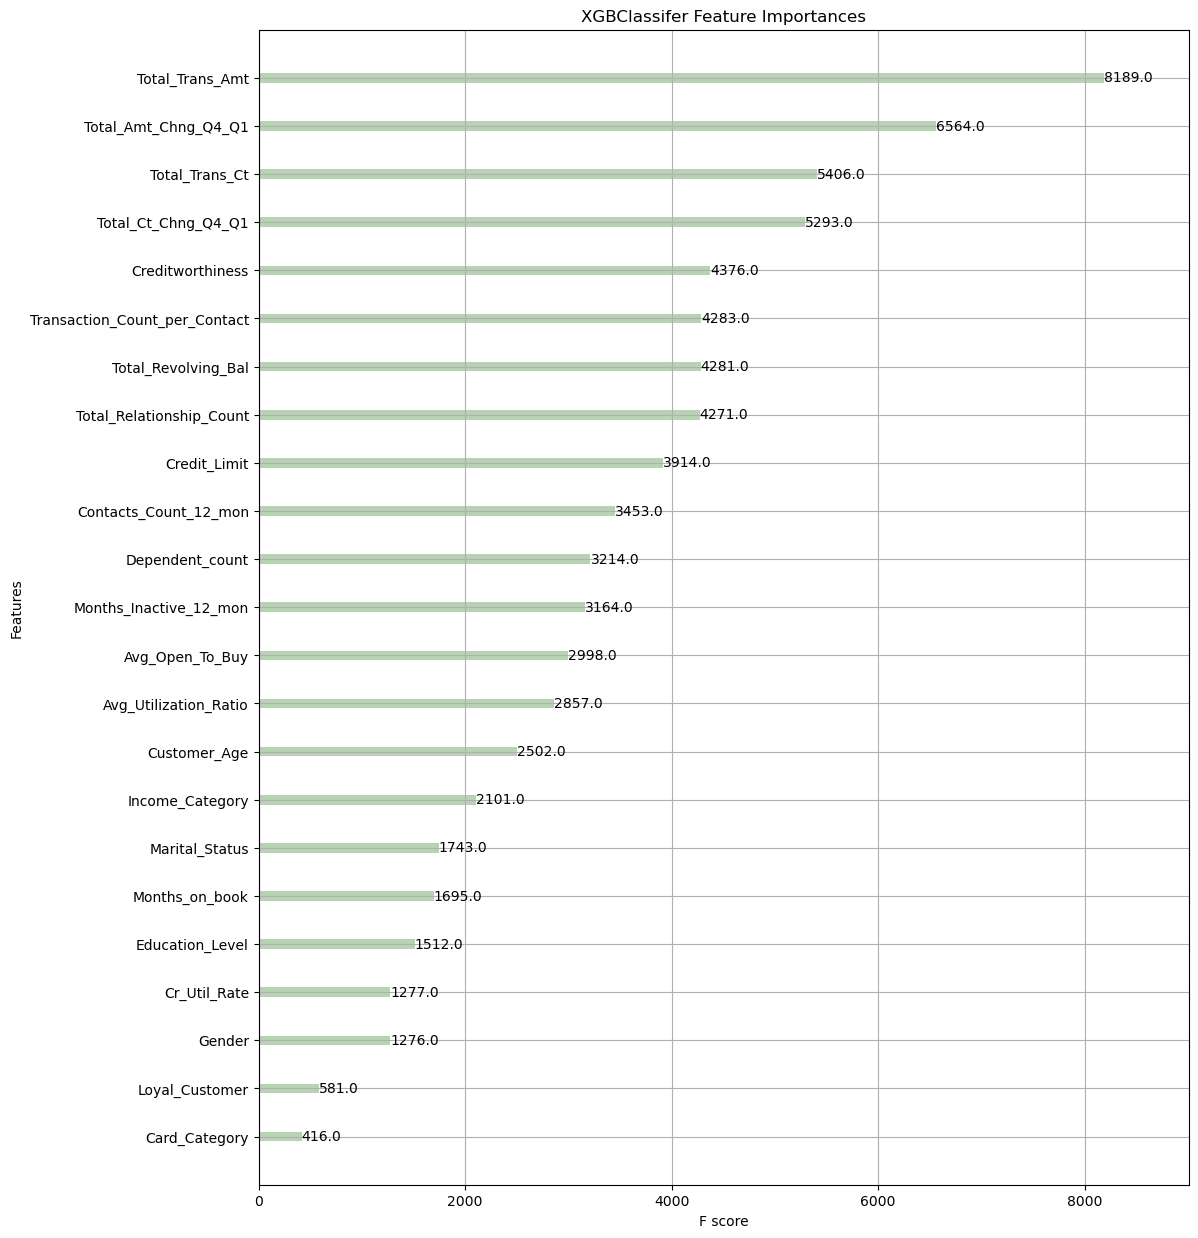

In [50]:
# Plot feature importances
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(12, 15))
plot_importance(xgboost_final, ax=ax, color='#b7d3b3')
plt.title("XGBClassifer Feature Importances");
plt.show();